In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy as sp
import numpy as np

In [2]:
#global constants
_plot_width = 11
_plot_height = 8
_dotsize = 30
_linewidth = 0.5
_dpi = 350

In [3]:
def generate_polyfit_y(x, polyfit_constants):
    y = np.zeros(len(x))
    for i in range(len(polyfit_constants)):
        y += x**(len(polyfit_constants) - 1 - i) * polyfit_constants[i]
    return y

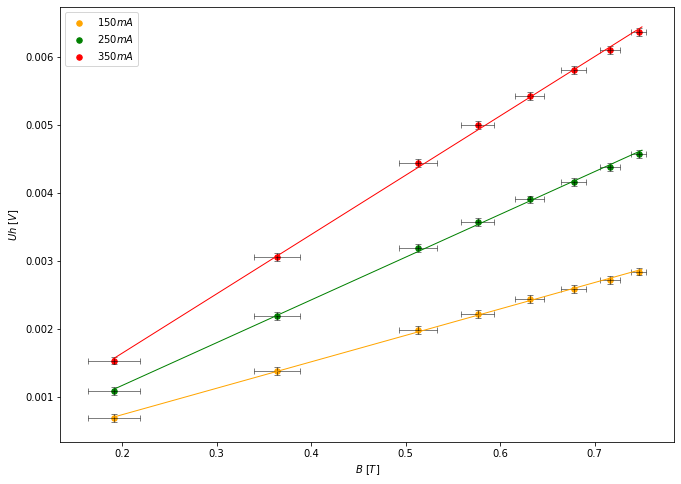

150: [ 3.89046091e-03 -4.48907613e-05]
250: [ 6.29495632e-03 -9.58334362e-05]
350: [ 0.00873091 -0.00010789]


In [4]:
B = pd.read_csv("csv/B.csv")
Uh_150 = pd.read_csv("csv/Uh_150.csv")
Uh_250 = pd.read_csv("csv/Uh_250.csv")
Uh_350 = pd.read_csv("csv/Uh_350.csv")

plt.figure(figsize=(_plot_width,_plot_height))
x_fit = np.arange(0.19,0.75,0.01)

dotcolor = "orange"
plt.scatter(B["B"], Uh_150["Uh"], s = _dotsize, color=dotcolor, label = r'$150 mA$')
plt.errorbar(B["B"], Uh_150["Uh"], xerr=B["u"],yerr=Uh_150["u"],capsize=3,capthick=_linewidth,elinewidth=_linewidth,fmt="none", ecolor="black")
Uh_150_consts = np.polyfit(B["B"], Uh_150["Uh"], 1)
plt.plot(x_fit, generate_polyfit_y(x_fit,Uh_150_consts), color=dotcolor, linewidth=2*_linewidth)

dotcolor = "green"
plt.scatter(B["B"], Uh_250["Uh"], s = _dotsize, color=dotcolor, label = r'$250 mA$')
plt.errorbar(B["B"], Uh_250["Uh"], xerr=B["u"],yerr=Uh_250["u"],capsize=3,capthick=_linewidth,elinewidth=_linewidth,fmt="none", ecolor="black")
Uh_250_consts = np.polyfit(B["B"], Uh_250["Uh"], 1)
plt.plot(x_fit, generate_polyfit_y(x_fit,Uh_250_consts), color=dotcolor, linewidth=2*_linewidth)

dotcolor = "red"
plt.scatter(B["B"], Uh_350["Uh"], s = _dotsize, color=dotcolor, label = r'$350 mA$')
plt.errorbar(B["B"], Uh_350["Uh"], xerr=B["u"],yerr=Uh_350["u"],capsize=3,capthick=_linewidth,elinewidth=_linewidth,fmt="none", ecolor="black")
Uh_350_consts = np.polyfit(B["B"], Uh_350["Uh"], 1)
plt.plot(x_fit, generate_polyfit_y(x_fit,Uh_350_consts), color=dotcolor, linewidth=2*_linewidth)

plt.xlabel(r"$B$ $[T]$")
plt.ylabel(r"$Uh$ $\left[ V \right]$")

plt.legend()

plt.savefig("img/wyk_Uh_od_B.jpg", dpi=_dpi)
plt.show()

print("150:", Uh_150_consts)
print("250:", Uh_250_consts)
print("350:", Uh_350_consts)

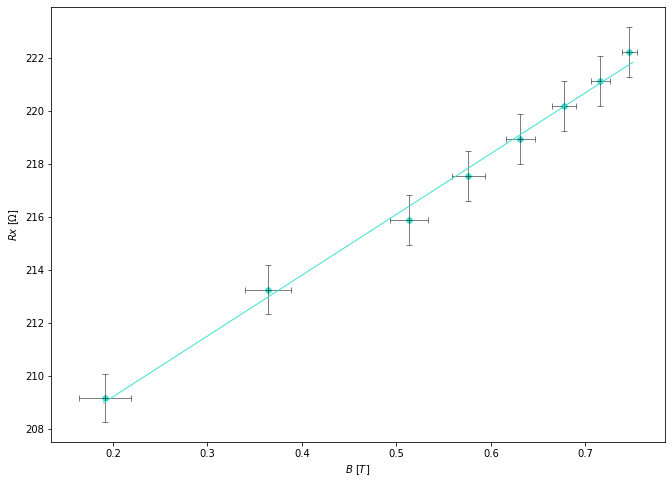

,Rx,u
0,209.160794,0.905941
1,213.260730,0.920472
2,215.887252,0.929804
3,217.552851,0.935731
4,218.962204,0.940752
5,220.179372,0.945092
6,221.140295,0.948521
7,222.229340,0.952410


In [5]:
Rx = pd.read_csv("csv/Rx.csv")

plt.figure(figsize=(_plot_width,_plot_height))

dotcolor = "turquoise"
plt.scatter(B["B"], Rx["Rx"], s = _dotsize, color=dotcolor)
plt.errorbar(B["B"], Rx["Rx"], xerr=B["u"], yerr=Rx["u"],capsize=3,capthick=_linewidth,elinewidth=_linewidth,fmt="none", ecolor="black")
Rx_consts = np.polyfit(B["B"], Rx["Rx"], 1)
plt.plot(x_fit, generate_polyfit_y(x_fit,Rx_consts), color=dotcolor, linewidth=2*_linewidth)

plt.xlabel(r"$B$ $[T]$")
plt.ylabel(r"$Rx$ $\left[ \Omega \right]$")

plt.savefig("img/wyk_Rx_od_B.jpg", dpi=_dpi)
plt.show()
Rx